In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Computational Mechanics Project #01 - Heat Transfer in Forensic Science

We can use our current skillset for a macabre application. We can predict the time of death based upon the current temperature and change in temperature of a corpse. 

Forensic scientists use Newton's law of cooling to determine the time elapsed since the loss of life, 

$\frac{dT}{dt} = -K(T-T_a)$,

where $T$ is the current temperature, $T_a$ is the ambient temperature, $t$ is the elapsed time in hours, and $K$ is an empirical constant. 

Suppose the temperature of the corpse is 85$^o$F at 11:00 am. Then, 2 hours later the temperature is 74$^{o}$F. 

Assume ambient temperature is a constant 65$^{o}$F.

1. Use Python to calculate $K$ using a finite difference approximation, $\frac{dT}{dt} \approx \frac{T(t+\Delta t)-T(t)}{\Delta t}$.

In [2]:
dTdt = (74-85)/2
constant_K = (-1) * dTdt * (1/(74-65))
print(constant_K)

0.611111111111111


2. Change your work from problem 1 to create a function that accepts the temperature at two times, ambient temperature, and the time elapsed to return $K$.

In [3]:
def find_K(temp1, temp2, tempAmb, time_elapsed):
    dTdt = (temp2-temp1)/time_elapsed
    constant_K = (-1) * dTdt * (1/(temp2-tempAmb))
    return constant_K

In [4]:
find_K(85,74,65,2)

0.611111111111111

3. A first-order thermal system has the following analytical solution, 

    $T(t) =T_a+(T(0)-T_a)e^{-Kt}$

    where $T(0)$ is the temperature of the corpse at t=0 hours i.e. at the time of discovery and $T_a$ is a constant ambient temperature. 

    a. Show that an Euler integration converges to the analytical solution as the time step is decreased. Use the constant $K$ derived above and the initial temperature, T(0) = 85$^o$F. 

    b. What is the final temperature as t$\rightarrow\infty$?
    
    c. At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

B. It would approach the ambient temp of 65 deg F


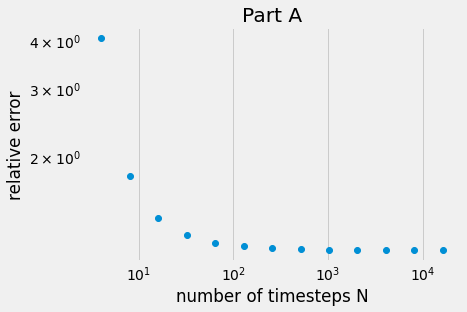

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
total_time = 4 #hours
def tempValues(steps):
    t_euler = [] # np.zeros(steps)
    t_time = [] #np.linspace(0,total_time,steps)
    
    t_euler.append(85)
    oldTemp = 85
    t_time.append(0)
    oldTime = 0
    
    interval = total_time/steps
    for i in range(steps):
        oldTime += interval
        oldTemp = 5*((7942*interval) - 200*oldTemp)/(611*interval - 1000)
        t_time.append(oldTime)
        t_euler.append(oldTemp)
    #print(t_euler)
    t_analyitical = []
    error_vals = []
    index = 0  
    for timeVal in t_time:
        newTemp = 65+20*math.exp(-0.611*timeVal)
        t_analyitical.append(newTemp)
        error_vals.append((t_euler[index] - newTemp)/newTemp)
        index +=1
    return np.mean(error_vals)
#Part A
n = []
error = []

tempValues(100)
for i in range(2,15):
  steps = int(math.pow(2,i))
  n.append(steps)
  error.append(tempValues(steps))


plt.loglog(n, error,'o')
plt.xlabel('number of timesteps N')
plt.ylabel('relative error')
plt.title('Part A')
plt.show

print("B. It would approach the ambient temp of 65 deg F")

#Part C
# 98.6 = 65 + (85-65)*e^(-0.611t)
# t ~ -0.85 
# time of death was 0.85 hr = 51.6 mins before time of discovery

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [7]:
'''
4. Now that we have a working numerical model, we can look at the results if the
ambient temperature is not constant i.e. T_a=f(t). We can use the weather to improve our estimate for time of death. Consider the following Temperature for the day in question. 

    |time| Temp ($^o$F)|
    |---|---|
    |6am|50|
    |7am|51|
    |8am|55|
    |9am|60|
    |10am|65|
    |11am|70|
    |noon|75|
    |1pm|80|

    a. Create a function that returns the current temperature based upon the time (0 hours=11am, 65$^{o}$F) 
    *Plot the function $T_a$ vs time. Does it look correct? Is there a better way to get $T_a(t)$?
'''

'\n4. Now that we have a working numerical model, we can look at the results if the\nambient temperature is not constant i.e. T_a=f(t). We can use the weather to improve our estimate for time of death. Consider the following Temperature for the day in question. \n\n    |time| Temp ($^o$F)|\n    |---|---|\n    |6am|50|\n    |7am|51|\n    |8am|55|\n    |9am|60|\n    |10am|65|\n    |11am|70|\n    |noon|75|\n    |1pm|80|\n\n    a. Create a function that returns the current temperature based upon the time (0 hours=11am, 65$^{o}$F) \n    *Plot the function $T_a$ vs time. Does it look correct? Is there a better way to get $T_a(t)$?\n'

In [8]:
t = [6, 7, 8, 9, 10, 11, 12, 13]
temps = [50,51,55,60,65,70,75,80]
def t_ambient(hour):
    if hour > 3:
        return temps[0]
    else:
        return np.interp(hour+10,t,temps)
    
print(t_ambient(-1))
print("test")

60.0
test


<function matplotlib.pyplot.show(close=None, block=None)>

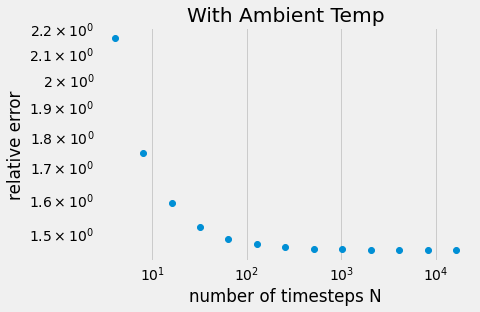

In [9]:
#b. Modify the Euler approximation solution to account for changes in temperature at each hour. 
#Compare the new nonlinear Euler approximation to the linear analytical model. 
#At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

    
total_time = 2 #hours
def tempValues(steps):
    
    t_euler = [] # np.zeros(steps)
    t_time = [] #np.linspace(0,total_time,steps)
    
    t_euler.append(t_ambient(0))
    oldTemp = t_ambient(0)
    t_time.append(0)
    oldTime = 0
    
    interval = total_time/steps
    for i in range(steps):
        oldTime += interval
        oldTemp = ((-1*oldTemp/interval)-0.611*t_ambient(oldTime))/(0.611-1/interval)
        t_time.append(oldTime)
        t_euler.append(oldTemp)
    t_analyitical = []
    error_vals = []
    index = 0
    for timeVal in t_time:
        newTemp = t_ambient(timeVal) + (85-t_ambient(timeVal))*np.exp(-0.611*timeVal)
        t_analyitical.append(newTemp)
        error_vals.append((t_euler[index] - newTemp)/newTemp)
        index +=1
    return np.mean(error_vals)

n = []
error = []


for i in range(2,15):
  steps = int(math.pow(2,i))
  n.append(steps)
  error.append(tempValues(steps))


plt.loglog(n, error,'o')
plt.xlabel('number of timesteps N')
plt.ylabel('relative error')
plt.title('With Ambient Temp')
plt.show